In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")


: 

In [149]:
# load the data
total_regular_cycle_data = pd.read_csv('dataset\\total_regular_cycle_data.csv')

In [150]:
total_regular_cycle_data.head()

,M,Day,Year,Duration
0,1,25,2021,Starts
1,1,30,2021,Ends
2,2,24,2021,Starts
3,3,1,2021,Ends
4,3,26,2021,Starts


In [151]:
# generate the final features
features_total_regular_cycle_data, labels_total_regular_cycle_data = generate_final_features(total_regular_cycle_data)

In [ ]:
# slice the data with split_dataset function
input_train_total_regular_cycle, input_test_total_regular_cycle, output_train_total_regular_cycle, output_test_total_regular_cycle = split_dataset(features_total_regular_cycle_data, labels_total_regular_cycle_data, reshape=False)

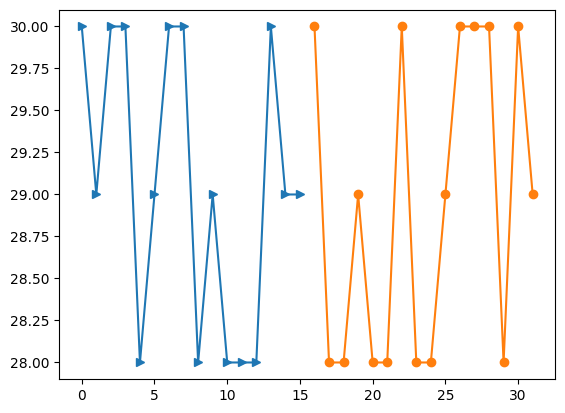

In [153]:
plt.plot(np.arange(16),input_train_total_regular_cycle[:,0,0], '->')
plt.plot(np.arange(16, 2*16),output_train_total_regular_cycle[:,0], '-o')

In [194]:
# create and fit the LSTM network
n_features = input_train_total_regular_cycle.shape[2]
model = Sequential()
model.add(LSTM(64, input_shape=(3, n_features),  activation='tanh'))
model.add(Dropout(0.05))
model.add(Dense(n_features, activation='relu'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                17152     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 2)                 130       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


In [195]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, run_eagerly=True)
# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=5, restore_best_weights=True)

In [196]:
history = model.fit(input_train_total_regular_cycle, output_train_total_regular_cycle, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 1s 974ms/step - loss: 418.1097 - val_loss: 404.2635
Epoch 2/100
1/1 [==============================] - 1s 515ms/step - loss: 392.5491 - val_loss: 382.2798
Epoch 3/100
1/1 [==============================] - 0s 479ms/step - loss: 371.8072 - val_loss: 360.7062
Epoch 4/100
1/1 [==============================] - 1s 577ms/step - loss: 349.4024 - val_loss: 338.0058
Epoch 5/100
1/1 [==============================] - 1s 518ms/step - loss: 328.1111 - val_loss: 314.2502
Epoch 6/100
1/1 [==============================] - 0s 419ms/step - loss: 305.6156 - val_loss: 290.0382
Epoch 7/100
1/1 [==============================] - 1s 633ms/step - loss: 279.5477 - val_loss: 266.6857
Epoch 8/100
1/1 [==============================] - 1s 598ms/step - loss: 257.9811 - val_loss: 245.6517
Epoch 9/100
1/1 [==============================] - 1s 585ms/step - loss: 237.3702 - val_loss: 227.6984
Epoch 10/100
1/1 [==============================] - 1s 503ms/step - loss:

(70.0, 93.0)

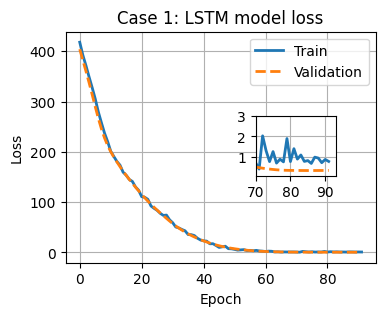

In [241]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 1: LSTM model loss')
ax = plt.axes([0.6, 0.4, .20, .20])
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
ax.set_ylim(0.1, 3)
ax.set_xlim(70, 93)
# save history
history_df = pd.DataFrame(history.history)
history_df.to_csv('case1_history_lstm.csv', index=False)


In [210]:
# make predictions
trainPredict = model.predict(input_train_total_regular_cycle)
testPredict = model.predict(input_test_total_regular_cycle)
testPredict = np.round(testPredict)

1/1 [==============================] - 0s 149ms/step


In [218]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_total_regular_cycle, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_total_regular_cycle, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_total_regular_cycle, testPredict)
print('Test Score: %.2f R2' % (testScore))




Test Score: 0.55 RMSE
Test Score: 0.30 MAE
Test Score: 0.46 R2


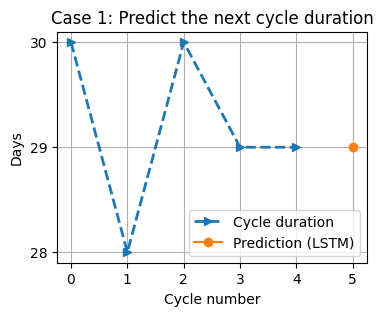

In [219]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_total_regular_cycle[:,0], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 1: Predict the next cycle duration')
plt.grid(True)
plt.show()

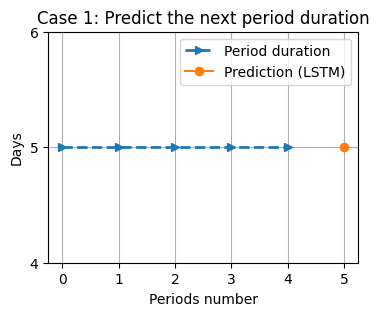

In [220]:
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_total_regular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 6)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 1: Predict the next period duration')
plt.grid(True)
plt.show()